In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('../data/REVL COOF VALUATION 07-2023.csv')

df = df[[c for c in df.columns if 'unnamed' not in c.lower()]]
x = [c.replace('\n','') for c in df.columns]
x = [c.replace(' ','_') for c in x]
x = [c.lower() for c in x]
df.columns = x
df['naics'] = df['naics'].astype(int)

df['term_yrs']=df['term']//12

x_df = df[['naics','loan_spread','loan_rate','strip_rate','original_balance','current_balance','term_yrs','term','age','rmos']]
y_df = df['valuation_multiple']

X = x_df
y = y_df

def get_naics_dummies(in_df:pd.DataFrame)->pd.DataFrame:
    temp = pd.concat([in_df, pd.get_dummies(in_df['naics']).astype(int)], axis=1).drop(columns='naics')
    temp.columns = [str(c) for c in temp.columns]
    return temp

# Create dummy columns with all the categories observed in the entire dataset
X = get_naics_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()

scaler = StandardScaler()

scaler.fit_transform(X_train, y_train)

# Train the model on the training data
reg_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = reg_model.predict(X_test)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 0.011332703923177206
R-squared: 0.9039114141142501


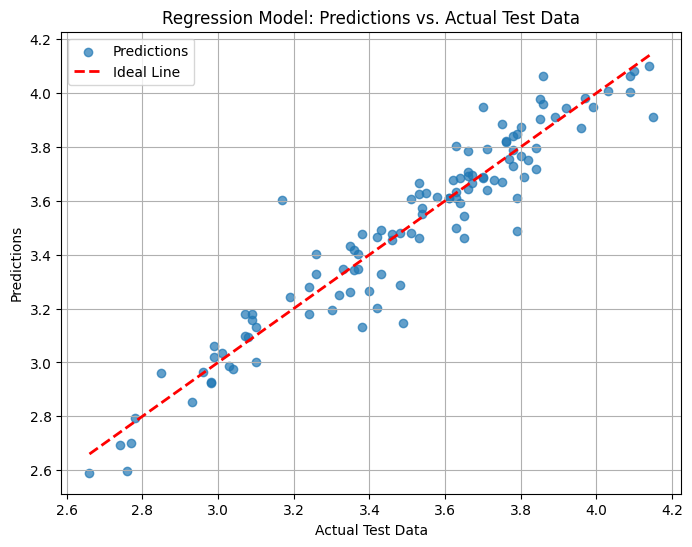

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the predictions vs the actual test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ideal Line')
plt.xlabel('Actual Test Data')
plt.ylabel('Predictions')
plt.title('Regression Model: Predictions vs. Actual Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [13]:

# Get the coefficients (weights) of the linear regression model
coefficients = reg_model.coef_


feature_names = X.columns

# Print the coefficients with corresponding feature names
coef = ( dict(zip(feature_names, coefficients)) )

coef['721110']
    

-0.26532089206639586

In [12]:
df['naics'].value_counts()

naics
721110    94
722511    25
457110    23
624410    21
811192    19
          ..
456110     1
562910     1
212311     1
721211     1
238150     1
Name: count, Length: 177, dtype: int64

In [5]:
print('coefficients:', len(reg_model.coef_) )
print('features:', len(X.columns))

coefficients: 186
features: 186


In [14]:
test_df = pd.read_csv('../data/valuation_test.csv')

test_df = test_df[[c for c in test_df.columns if 'unnamed' not in c.lower()]]
x = [c.replace('\n','') for c in test_df.columns]
x = [c.replace(' ','_') for c in x]
x = [c.lower() for c in x]
test_df.columns = x
test_df['naics'] = test_df['naics'].astype(int)
test_df['term_yrs']=test_df['term']//12
x_test_df = test_df[['naics','loan_spread','loan_rate','strip_rate','original_balance','current_balance','term_yrs','term','age','rmos']]
x_test_df = get_naics_dummies(x_test_df)


In [20]:
features_to_add = set(X.columns.to_list())
features_present = set(x_test_df.columns.to_list())

cols_to_add = list(features_to_add - (features_present))

for c in cols_to_add:
    x_test_df[c] = 0

y_pred = reg_model.predict(x_test_df)
x_test_df['predicted_multiple'] = y_pred

x_test_df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 115210
- 221310
- 238330
- 238390
- 311999
- ...
